In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# globals
vref = 1
bioz_gain = 10
i_mag = 45.249e-6
two_over_pi=2/np.pi


i_coef_131k = 1.0055 # 131.072 kHz
q_coef_131k = 1.0097 # 131.072 kHz
i_phase_coef_131k = 0.432 # 131.072 kHz
q_phase_coef_131k = 0.648 # 131.072 kHz
i_offset_count_131k = -507.7 # 131.072 kHz
q_offset_count_131k = -137.3 # 131.072 kHz

In [3]:
i_coef_4k = .9 # 4.096 kHz
q_coef_4k = .9016 # 4.096 kHz
i_phase_coef_4k = -22.458 # 4.096 kHz
q_phase_coef_4k = -22.57 # 4.096 kHz
i_offset_count_4k = -488.7 # 4.096 kHz
q_offset_count_4k = -258.5 # 4.096 kHz

# Calibrating 4.096 kHz samples taken with the MAX32620

In [31]:
df_4k = pd.read_csv("logs_32620-system/logs/4khz/MAX30009_20251019_014516.bioz.csv", usecols=["BIOZI", "BIOZQ"])

df_4k

,BIOZI,BIOZQ
0,5485.0,-3814.0
1,5487.0,-3813.0
2,5488.0,-3813.0
3,5488.0,-3813.0
4,5488.0,-3812.0
...,...,...
164,5485.0,-3812.0
165,5486.0,-3812.0
166,5489.0,-3811.0
167,5490.0,-3810.0


Applying count to bioz conversion formula to uncalibrated samples for 4 kHz

In [32]:
df_4k["I_nocalib"]=df_4k["BIOZI"].apply(lambda i: (i * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))

df_4k["Q_nocalib"]=df_4k["BIOZQ"].apply(lambda q: (q * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))

df_4k

,BIOZI,BIOZQ,I_nocalib,Q_nocalib
0,5485.0,-3814.0,36.317639,-25.253505
1,5487.0,-3813.0,36.330881,-25.246884
2,5488.0,-3813.0,36.337503,-25.246884
3,5488.0,-3813.0,36.337503,-25.246884
4,5488.0,-3812.0,36.337503,-25.240262
...,...,...,...,...
164,5485.0,-3812.0,36.317639,-25.240262
165,5486.0,-3812.0,36.324260,-25.240262
166,5489.0,-3811.0,36.344124,-25.233641
167,5490.0,-3810.0,36.350745,-25.227020


Applying mag and phase calibration coeffitients and removing offsets from 4k measurements

In [34]:
# subtract offests from load impedances
df_4k["i_load_offset"]=df_4k["BIOZI"].apply(lambda biozi: biozi - i_offset_count_4k)
df_4k["q_load_offset"]=df_4k["BIOZQ"].apply(lambda biozi: biozi - q_offset_count_4k)

# apply i and q coefs, correcting magnitude/phase delay
df_4k["i_cal_real"]=df_4k["i_load_offset"].apply(lambda i_load_offset: (i_load_offset/i_coef_4k)*np.cos(i_phase_coef_4k*np.pi/180))
df_4k["i_cal_imag"]=df_4k["i_load_offset"].apply(lambda i_load_offset: (i_load_offset/i_coef_4k)*np.sin(i_phase_coef_4k*np.pi/180))

df_4k["q_cal_real"]=df_4k["q_load_offset"].apply(lambda q_load_offset: (q_load_offset/q_coef_4k)*np.sin(q_phase_coef_4k*np.pi/180))
df_4k["q_cal_imag"]=df_4k["q_load_offset"].apply(lambda q_load_offset: (q_load_offset/q_coef_4k)*np.cos(q_phase_coef_4k*np.pi/180))

# calculate load impedance
df_4k["load_real"]=df_4k["i_cal_real"]-df_4k["q_cal_real"]
df_4k["load_imag"]=df_4k["i_cal_imag"]+df_4k["q_cal_imag"]

df_4k

,BIOZI,BIOZQ,I_nocalib,Q_nocalib,i_load_offset,q_load_offset,i_cal_real,i_cal_imag,q_cal_real,q_cal_imag,load_real,load_imag
0,5485.0,-3814.0,36.317639,-25.253505,5973.7,-3555.5,6134.059369,-2535.544203,1513.579340,-3641.513867,4620.480029,-6177.058070
1,5487.0,-3813.0,36.330881,-25.246884,5975.7,-3554.5,6136.113058,-2536.393106,1513.153639,-3640.489675,4622.959418,-6176.882781
2,5488.0,-3813.0,36.337503,-25.246884,5976.7,-3554.5,6137.139902,-2536.817557,1513.153639,-3640.489675,4623.986263,-6177.307232
3,5488.0,-3813.0,36.337503,-25.246884,5976.7,-3554.5,6137.139902,-2536.817557,1513.153639,-3640.489675,4623.986263,-6177.307232
4,5488.0,-3812.0,36.337503,-25.240262,5976.7,-3553.5,6137.139902,-2536.817557,1512.727939,-3639.465483,4624.411963,-6176.283040
...,...,...,...,...,...,...,...,...,...,...,...,...
164,5485.0,-3812.0,36.317639,-25.240262,5973.7,-3553.5,6134.059369,-2535.544203,1512.727939,-3639.465483,4621.331431,-6175.009687
165,5486.0,-3812.0,36.324260,-25.240262,5974.7,-3553.5,6135.086213,-2535.968655,1512.727939,-3639.465483,4622.358275,-6175.434138
166,5489.0,-3811.0,36.344124,-25.233641,5977.7,-3552.5,6138.166746,-2537.242008,1512.302238,-3638.441292,4625.864508,-6175.683300
167,5490.0,-3810.0,36.350745,-25.227020,5978.7,-3551.5,6139.193590,-2537.666459,1511.876537,-3637.417100,4627.317054,-6175.083559


# Calibrating 131.072 kHz measurements done with the MAX32620

Going to source samples from csv and then convert them from counts to bioz just to visualize the impedance values of the 131 kHz data without calibration

In [38]:
df_131k = pd.read_csv("logs_32620-system/logs/131khz/MAX30009_20251021_171535.bioz.csv", usecols=["BIOZI", "BIOZQ"])
df_131k["I_nocalib"]=df_131k["BIOZI"].apply(lambda i: (i * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))
df_131k["Q_nocalib"]=df_131k["BIOZQ"].apply(lambda q: (q * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))

df_131k

,BIOZI,BIOZQ,I_nocalib,Q_nocalib
0,3327.0,-306.0,22.028949,-2.026107
1,3219.0,-441.0,21.313852,-2.919978
2,3242.0,-413.0,21.466141,-2.734582
3,3261.0,-390.0,21.591945,-2.582293
4,3257.0,-393.0,21.565460,-2.602157
...,...,...,...,...
532,3253.0,-399.0,21.538975,-2.641885
533,3254.0,-399.0,21.545597,-2.641885
534,3254.0,-399.0,21.545597,-2.641885
535,3255.0,-399.0,21.552218,-2.641885


In [39]:
# subtract offests from load impedances
df_131k["i_load_offset"]=df_131k["BIOZI"].apply(lambda biozi: biozi - i_offset_count_131k)
df_131k["q_load_offset"]=df_131k["BIOZQ"].apply(lambda biozi: biozi - q_offset_count_131k)

# apply i and q coefs, correcting magnitude/phase delay
df_131k["i_cal_real"]=df_131k["i_load_offset"].apply(lambda i_load_offset: (i_load_offset/i_coef_131k)*np.cos(i_phase_coef_131k*np.pi/180))
df_131k["i_cal_imag"]=df_131k["i_load_offset"].apply(lambda i_load_offset: (i_load_offset/i_coef_131k)*np.sin(i_phase_coef_131k*np.pi/180))

df_131k["q_cal_real"]=df_131k["q_load_offset"].apply(lambda q_load_offset: (q_load_offset/q_coef_131k)*np.sin(q_phase_coef_131k*np.pi/180))
df_131k["q_cal_imag"]=df_131k["q_load_offset"].apply(lambda q_load_offset: (q_load_offset/q_coef_131k)*np.cos(q_phase_coef_131k*np.pi/180))

# calculate load impedance
df_131k["load_real"]=df_131k["i_cal_real"]-df_131k["q_cal_real"]
df_131k["load_imag"]=df_131k["i_cal_imag"]+df_131k["q_cal_imag"]

df_131k

,BIOZI,BIOZQ,I_nocalib,Q_nocalib,i_load_offset,q_load_offset,i_cal_real,i_cal_imag,q_cal_real,q_cal_imag,load_real,load_imag
0,3327.0,-306.0,22.028949,-2.026107,3834.7,-168.7,3813.616113,28.754533,-1.889582,-167.068645,3815.505695,-138.314112
1,3219.0,-441.0,21.313852,-2.919978,3726.7,-303.7,3706.209917,27.944694,-3.401696,-300.763174,3709.611613,-272.818480
2,3242.0,-413.0,21.466141,-2.734582,3749.7,-275.7,3729.083458,28.117160,-3.088073,-273.033939,3732.171531,-244.916779
3,3261.0,-390.0,21.591945,-2.582293,3768.7,-252.7,3747.978993,28.259631,-2.830453,-250.256352,3750.809446,-221.996721
4,3257.0,-393.0,21.565460,-2.602157,3764.7,-255.7,3744.000986,28.229637,-2.864056,-253.227342,3746.865041,-224.997704
...,...,...,...,...,...,...,...,...,...,...,...,...
532,3253.0,-399.0,21.538975,-2.641885,3760.7,-261.7,3740.022978,28.199643,-2.931261,-259.169321,3742.954239,-230.969677
533,3254.0,-399.0,21.545597,-2.641885,3761.7,-261.7,3741.017480,28.207142,-2.931261,-259.169321,3743.948741,-230.962179
534,3254.0,-399.0,21.545597,-2.641885,3761.7,-261.7,3741.017480,28.207142,-2.931261,-259.169321,3743.948741,-230.962179
535,3255.0,-399.0,21.552218,-2.641885,3762.7,-261.7,3742.011982,28.214640,-2.931261,-259.169321,3744.943243,-230.954680


# Converting calibrated 4.096 kHz and 131.072 kHz calibrated counts to BioZ

In [41]:
# convert from counts to BioZ
two_over_pi=2/np.pi

df_4k["I"]=df_4k["load_real"].apply(lambda i: (i * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))
df_4k["Q"]=df_4k["load_imag"].apply(lambda q: (q * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))
df_131k["I"]=df_131k["load_real"].apply(lambda i: (i * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))
df_131k["Q"]=df_131k["load_imag"].apply(lambda q: (q * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))

df_131k

,BIOZI,BIOZQ,I_nocalib,Q_nocalib,i_load_offset,q_load_offset,i_cal_real,i_cal_imag,q_cal_real,q_cal_imag,load_real,load_imag,I,Q
0,3327.0,-306.0,22.028949,-2.026107,3834.7,-168.7,3813.616113,28.754533,-1.889582,-167.068645,3815.505695,-138.314112,25.263475,-0.915814
1,3219.0,-441.0,21.313852,-2.919978,3726.7,-303.7,3706.209917,27.944694,-3.401696,-300.763174,3709.611613,-272.818480,24.562322,-1.806403
2,3242.0,-413.0,21.466141,-2.734582,3749.7,-275.7,3729.083458,28.117160,-3.088073,-273.033939,3732.171531,-244.916779,24.711697,-1.621659
3,3261.0,-390.0,21.591945,-2.582293,3768.7,-252.7,3747.978993,28.259631,-2.830453,-250.256352,3750.809446,-221.996721,24.835104,-1.469899
4,3257.0,-393.0,21.565460,-2.602157,3764.7,-255.7,3744.000986,28.229637,-2.864056,-253.227342,3746.865041,-224.997704,24.808987,-1.489769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,3253.0,-399.0,21.538975,-2.641885,3760.7,-261.7,3740.022978,28.199643,-2.931261,-259.169321,3742.954239,-230.969677,24.783092,-1.529311
533,3254.0,-399.0,21.545597,-2.641885,3761.7,-261.7,3741.017480,28.207142,-2.931261,-259.169321,3743.948741,-230.962179,24.789677,-1.529262
534,3254.0,-399.0,21.545597,-2.641885,3761.7,-261.7,3741.017480,28.207142,-2.931261,-259.169321,3743.948741,-230.962179,24.789677,-1.529262
535,3255.0,-399.0,21.552218,-2.641885,3762.7,-261.7,3742.011982,28.214640,-2.931261,-259.169321,3744.943243,-230.954680,24.796262,-1.529212


In [42]:
print("4.096 kHz calibrated I (Ohms): ", df_4k["I"].mean())
print("4.096 kHz calibrated Q (Ohms): ", df_4k["Q"].mean())
print("131.072 kHz calibrated I (Ohms): ", df_131k["I"].mean())
print("131.072 kHz calibrated Q (Ohms): ", df_131k["Q"].mean())

4.096 kHz calibrated I (Ohms):  30.611429579805463
4.096 kHz calibrated Q (Ohms):  -40.886786661896544
131.072 kHz calibrated I (Ohms):  24.789184813769964
131.072 kHz calibrated Q (Ohms):  -1.5182747972901605


In [49]:
import csv
from datetime import datetime as date

df_4k.to_csv(f"logs_32620-system/logs_calibrated/MAX30009_Samples_4khz_{date.now().strftime("%Y-%m-%d %H-%M")}.csv", columns=["I", "Q"])
df_131k.to_csv(f"logs_32620-system/logs_calibrated/MAX30009_Samples_131khz_{date.now().strftime("%Y-%m-%d %H-%M")}.csv", columns=["I", "Q"])

# Graphing calibrated 4.096 kHz and 131.072 kHz samples

In [46]:
headers = ["I", "Q"]
df_4k = pd.read_csv("logs_32620-system/logs_calibrated/MAX30009_Samples_4khz_2025-11-07 06-14.csv", usecols=["I", "Q"])

df_4k

df_131 = pd.read_csv("logs_32620-system/logs_calibrated/MAX30009_Samples_131khz_2025-11-07 06-14.csv", usecols=["I", "Q"])

df_131

,I,Q
0,25.263475,-0.915814
1,24.562322,-1.806403
2,24.711697,-1.621659
3,24.835104,-1.469899
4,24.808987,-1.489769
...,...,...
532,24.783092,-1.529311
533,24.789677,-1.529262
534,24.789677,-1.529262
535,24.796262,-1.529212


### 4.096 kHz

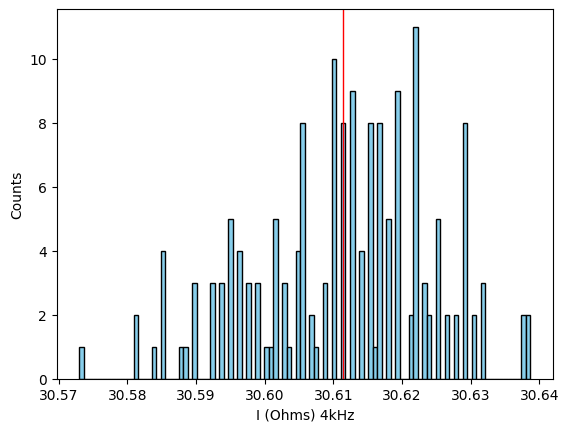

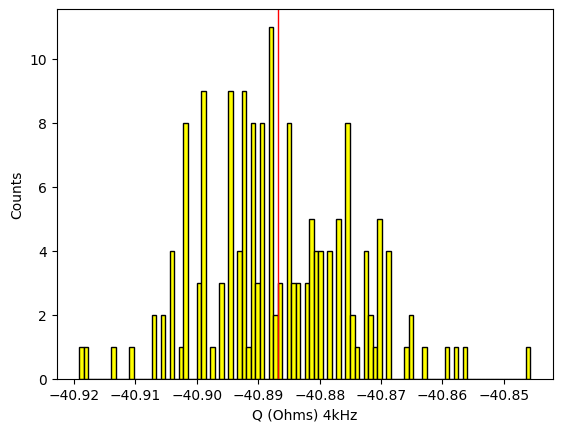

In [45]:
i_mean = df_4k["I"].mean()
i_hist = plt.hist(df_4k["I"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("I (Ohms) 4kHz")
plt.ylabel("Counts")

plt.axvline(i_mean, color="red", linewidth="1")

plt.show(i_hist)

q_mean = df_4k["Q"].mean()
q_hist = plt.hist(df_4k["Q"], bins=100, color="yellow", edgecolor="black")
plt.xlabel("Q (Ohms) 4kHz")
plt.ylabel("Counts")

plt.axvline(q_mean, color="red", linewidth="1")

plt.show(q_hist)

### 131.072 kHz

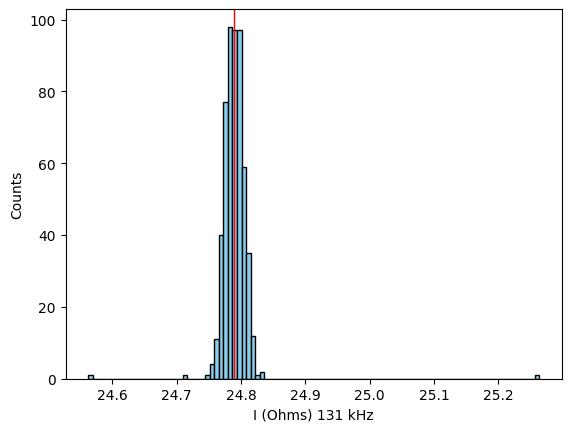

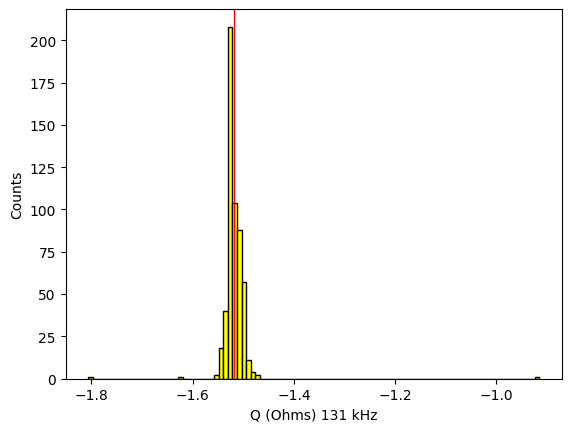

In [47]:
i_mean_131 = df_131["I"].mean()
i_hist_131 = plt.hist(df_131["I"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("I (Ohms) 131 kHz")
plt.ylabel("Counts")

plt.axvline(i_mean_131, color="red", linewidth="1")

plt.show(i_hist_131)

q_mean_131 = df_131["Q"].mean()
q_hist_131 = plt.hist(df_131["Q"], bins=100, color="yellow", edgecolor="black")
plt.xlabel("Q (Ohms) 131 kHz")
plt.ylabel("Counts")

plt.axvline(q_mean_131, color="red", linewidth="1")

plt.show(q_hist_131)

In [48]:
df_131.to_csv("df_131.csv", index=False)
df_4k.to_csv("df_4.csv", index=False) # 4k

print(f"131k Z_real: {df_131["I"].mean()}")
print(f"131k Z_imag: {df_131["Q"].mean()}")
print(f"4k Z_real: {df_4k["I"].mean()}")
print(f"4k Z_imag: {df_4k["Q"].mean()}")

131k Z_real: 24.789184813769964
131k Z_imag: -1.5182747972901605
4k Z_real: 30.611429579805463
4k Z_imag: -40.886786661896544
